In [125]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import PIL
import os
import re #regex
import numpy as np
import random
import pandas as pd
from sklearn.utils import shuffle


### Converting images to numpy array

img_dict = {}
directory ='skulls/'

for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        img = PIL.Image.open(directory+filename)
        img_sequence = img.getdata()
        img_array = np.array(img_sequence) 
        img_array = img_array/255 #normalize
        #print(img_array.shape)
        key = re.sub(r'\.[^.]*$',"",filename)
        img_dict[key] = img_array #saving np array to a dictionary

In [126]:
def cutLabel(string):
    re = ''
    for c in string:
        if c not in ['0','1','2','3','4','5','6','7','8','9','_']:
            re = re + c
    return re

In [127]:
directory = 'pact_pala_samples/'
size = (255,255)

X=[]
Y=[]
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        img = PIL.Image.open(directory+filename)
        img = img.convert("LA") #greyscale
        img = img.resize(size)
        data = np.array(img).astype('float32')/255
        X.append(data)
        label = re.sub(r'\.[^.]*$',"",filename) #removing file extension
        label = cutLabel(label) #removing numbers because Im bad at regex
        #print(label, filename) #debug
        Y.append(label)
        
X = np.array(X)
Y = np.array(Y)
#OneHot_labels = np.array([i for i in range(0,73)])


print(X.shape)
print(Y.shape)

(188, 255, 255, 2)
(188,)


### Binary encoding

In [128]:
binLabel = lambda l: 0 if l=='Pact' else 1
vfunc = np.vectorize(binLabel) 
Y = vfunc(Y)

In [129]:
np.array(np.where (X == 0)).shape

(4, 810066)

In [130]:
X, Y = shuffle(X, Y, random_state=0)

In [131]:
X_train = X[:120]
Y_train = Y[:120]
X_test  = X[120:]
Y_test  = Y[120:]

### Setting up CNN

In [132]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 253, 253, 32)      608       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [133]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20,validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 5.2310 - accuracy: 0.4167 - val_loss: 0.6670 - val_accuracy: 0.7083
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.7095 - accuracy: 0.4583 - val_loss: 0.6250 - val_accuracy: 0.7083
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6188 - accuracy: 0.6979 - val_loss: 0.4500 - val_accuracy: 0.8333
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.4873 - accuracy: 0.7188 - val_loss: 0.6004 - val_accuracy: 0.9167
Epoch 5/20
3/3 [==============================] - 5s 2s/step - loss: 0.4010 - accuracy: 0.8542 - val_loss: 0.2818 - val_accuracy: 0.9167
Epoch 6/20
3/3 [==============================] - 5s 2s/step - loss: 0.3623 - accuracy: 0.8438 - val_loss: 0.6830 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.4189 - accuracy: 0.8438 - val_loss: 0.2949 - val_accuracy: 0.9167
Epoch 8/20
3/3 [=========================

### Trying to avoid overfit by training with low epoch

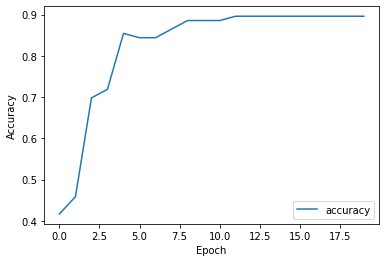

In [134]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [135]:
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)


3/3 [==============================] - 0s 160ms/step - loss: 0.3748 - accuracy: 0.8235
test loss, test acc: [0.37482815980911255, 0.8235294222831726]
